### Zadanie 11
Pobierz plik `Auto.csv`. Wczytaj go jako `DataFrame` i zmień kolumnę `origin` na typ `category`. Podziel dane na zbiór treningowy i walidacyjny.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Auto.csv')

# Convert all columns to numeric except 'name' and 'origin', coercing errors to NaN
df[df.columns.difference(['name', 'origin'])] = df[df.columns.difference(['name', 'origin'])].apply(pd.to_numeric, errors='coerce')
df['origin'] = df['origin'].astype('category')

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

print(train_df.head())
print(val_df.head())


      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
262  19.2          8         305.0       145.0    3425          13.2    78   
113  21.0          6         155.0       107.0    2472          14.0    73   
176  19.0          6         232.0        90.0    3211          17.0    75   
63   14.0          8         400.0       175.0    4385          12.0    72   
245  36.1          4          98.0        66.0    1800          14.4    78   

    origin                          name  
262      1  chevrolet monte carlo landau  
113      1              mercury capri v6  
176      1                     amc pacer  
63       1              pontiac catalina  
245      1                   ford fiesta  
      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
114  26.0          4          98.0        90.0    2265          15.5    73   
278  31.5          4          89.0        71.0    1990          14.9    78   
237  30.5          4          98.0     

**(a)** Użyj biblioteki `statsmodels` do wykonania regresji liniowej z `mpg` jako zmienną objaśnianą, a `horsepower` jako predyktorem (np. metoda OLS). Wyjaśnij informacje zwracane przez metodę `model.summary()`, w szczególności: *przedziały ufności*, *p-values*, *T-statistic*, *F-statistic* i $R^2$. Możesz się wzorować na tej analizie w Jupyter notebook.

In [3]:
import statsmodels.api as sm

# Drop rows with NaN values in 'horsepower' or 'mpg'
train_df = train_df.dropna(subset=['horsepower', 'mpg'])

# Define predictor and response variables
X_train = train_df['horsepower']
X_train = sm.add_constant(X_train)
y_train = train_df['mpg']

# Fit the model
model = sm.OLS(y_train, X_train)
result = model.fit()

# Print the summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     473.4
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           1.66e-64
Time:                        11:35:21   Log-Likelihood:                -944.51
No. Observations:                 314   AIC:                             1893.
Df Residuals:                     312   BIC:                             1901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8190      0.809     49.202      0.0

**(b)** Utwórz macierz wykresów punktowych (ang. scatterplot matrix), dla wszystkich zmiennych w zbiorze danych. Możesz użyć `pandas.plotting.scatter_matrix(...)`. Oblicz macierz korelacji między zmiennymi. Możesz użyć funkcji `corr()` dla `DataFrame` z biblioteki `pandas`.

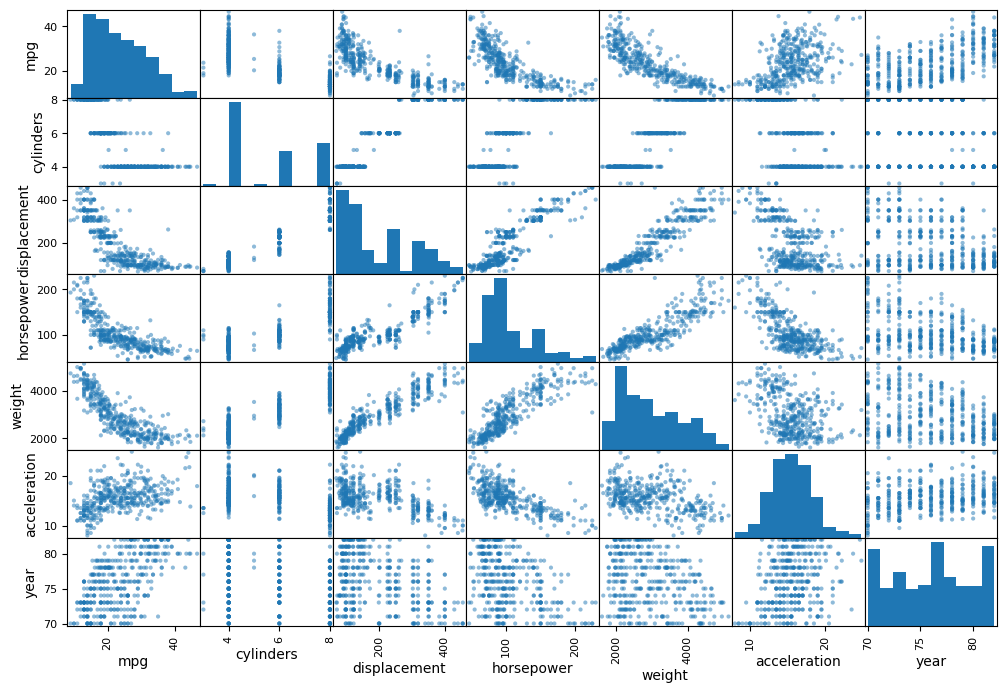

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.776260     -0.804443   -0.778427 -0.831739   
cylinders    -0.776260   1.000000      0.950920    0.842983  0.897017   
displacement -0.804443   0.950920      1.000000    0.897257  0.933104   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831739   0.897017      0.933104    0.864538  1.000000   
acceleration  0.422297  -0.504061     -0.544162   -0.689196 -0.419502   
year          0.581469  -0.346717     -0.369804   -0.416361 -0.307900   
origin        0.563698  -0.564972     -0.610664   -0.455171 -0.581265   

              acceleration      year    origin  
mpg               0.422297  0.581469  0.563698  
cylinders        -0.504061 -0.346717 -0.564972  
displacement     -0.544162 -0.369804 -0.610664  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.419502 -0.307900 -0.581265  
acceleration      1.000000  0.282901  0.210084  

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

# Create scatterplot matrix
scatter_matrix(df, figsize=(12, 8))
plt.show()

# Compute correlation matrix
correlation_matrix = df.drop(columns='name').corr()
print(correlation_matrix)

**(c)** Przeprowadź regresję liniową z `mpg` jako zmienną objaśnianą i wszystkimi innymi zmiennymi (z wyjątkiem `name`) jako predyktorami. Spróbuj zdefiniować różne modele wykorzystując biblioteką `patsy` i używając symboli `+`, `*`, `:` oraz różnych transformacji zmiennych, takich jak na przykład `I(np.log(X))` lub `I(np.sqrt(X))`. Co to jest błąd generalizacji? Dla którego modelu uzyskujesz najlepszy błąd generalizacji?

In [5]:
import patsy
import numpy as np
from sklearn.metrics import mean_squared_error

# Define the formula for the model
formula_0 = 'mpg ~ cylinders'
formula_5 = 'mpg ~ cylinders + horsepower + weight'
formula_1 = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
formula_2 = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.log(weight))'
formula_3 = 'mpg ~ cylinders * displacement + horsepower + weight + acceleration + year + origin'
formula_4 = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + I(np.sqrt(horsepower))'

# Create design matrices
y_train, X_train_0 = patsy.dmatrices(formula_0, data=train_df, return_type='dataframe')
y_train, X_train_1 = patsy.dmatrices(formula_1, data=train_df, return_type='dataframe')
y_train, X_train_2 = patsy.dmatrices(formula_2, data=train_df, return_type='dataframe')
y_train, X_train_3 = patsy.dmatrices(formula_3, data=train_df, return_type='dataframe')
y_train, X_train_4 = patsy.dmatrices(formula_4, data=train_df, return_type='dataframe')
y_train, X_train_5 = patsy.dmatrices(formula_5, data=train_df, return_type='dataframe')


# Fit the models
model_0 = sm.OLS(y_train, X_train_0).fit()
model_1 = sm.OLS(y_train, X_train_1).fit()
model_2 = sm.OLS(y_train, X_train_2).fit()
model_3 = sm.OLS(y_train, X_train_3).fit()
model_4 = sm.OLS(y_train, X_train_4).fit()
model_5 = sm.OLS(y_train, X_train_5).fit()

# Print the summaries
print(model_0.summary())
print(model_5.summary())
print(model_1.summary())
print(model_2.summary())
print(model_3.summary())
print(model_4.summary())

# Calculate generalization error for each model
y_val_0, X_val_0 = patsy.dmatrices(formula_0, data=val_df, return_type='dataframe')
y_val_1, X_val_1 = patsy.dmatrices(formula_1, data=val_df, return_type='dataframe')
y_val_2, X_val_2 = patsy.dmatrices(formula_2, data=val_df, return_type='dataframe')
y_val_3, X_val_3 = patsy.dmatrices(formula_3, data=val_df, return_type='dataframe')
y_val_4, X_val_4 = patsy.dmatrices(formula_4, data=val_df, return_type='dataframe')
y_val_5, X_val_5 = patsy.dmatrices(formula_5, data=val_df, return_type='dataframe')

pred_0 = model_0.predict(X_val_0)
pred_1 = model_1.predict(X_val_1)
pred_2 = model_2.predict(X_val_2)
pred_3 = model_3.predict(X_val_3)
pred_4 = model_4.predict(X_val_4)
pred_5 = model_5.predict(X_val_5)

mse_0 = mean_squared_error(y_val_0, pred_0)
mse_1 = mean_squared_error(y_val_1, pred_1)
mse_2 = mean_squared_error(y_val_2, pred_2)
mse_3 = mean_squared_error(y_val_3, pred_3)
mse_4 = mean_squared_error(y_val_4, pred_4)
mse_5 = mean_squared_error(y_val_5, pred_5)

print(f'Model 0 MSE: {mse_0}')
print(f'Model 5 MSE: {mse_5}')
print(f'Model 1 MSE: {mse_1}')
print(f'Model 2 MSE: {mse_2}')
print(f'Model 3 MSE: {mse_3}')
print(f'Model 4 MSE: {mse_4}')

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     507.0
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           2.38e-67
Time:                        11:35:24   Log-Likelihood:                -937.94
No. Observations:                 314   AIC:                             1880.
Df Residuals:                     312   BIC:                             1887.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9999      0.917     46.888      0.0

**(d)** Spróbuj znaleźć wartości odstające (ang. outliers) i usuń je ze zbioru danych. Możesz wykorzystać np. wykres reszt (ang. residual plot) albo Z-Score. Czym są punkty o wysokiej dźwigni (ang. high leverage points)? Jak możesz je wykryć (np. zobacz tutaj)? Ponownie wytrenuj swoje modele na oczyszczonych danych i porównaj wyniki. Pamiętaj, że usuwając obserwacje ze zbioru danych powinieneś mieć silne przesłanki, że zawierają one nieprawidłowe informacje. Usuwanie obserwacji tylko dlatego, że nie są podobne do innych nie jest dobrym pomysłem.

Residulas:
 262   -2.122474
113   -1.166415
176   -1.941276
63     2.340479
245    4.777132
         ...   
71    -5.185183
106    1.593787
270   -7.605482
348    3.822656
102   -3.508794
Length: 314, dtype: float64
Fittedvalues:
 262    21.322474
113    22.166415
176    20.941276
63     11.659521
245    31.322868
         ...    
71     24.185183
106    10.406213
270    28.705482
348    33.877344
102    29.508794
Length: 314, dtype: float64
Real values:
       mpg
262  19.2
113  21.0
176  19.0
63   14.0
245  36.1
..    ...
71   19.0
106  12.0
270  21.1
348  37.7
102  26.0

[314 rows x 1 columns]
Residulas mean:
 4.883057864639236e-13


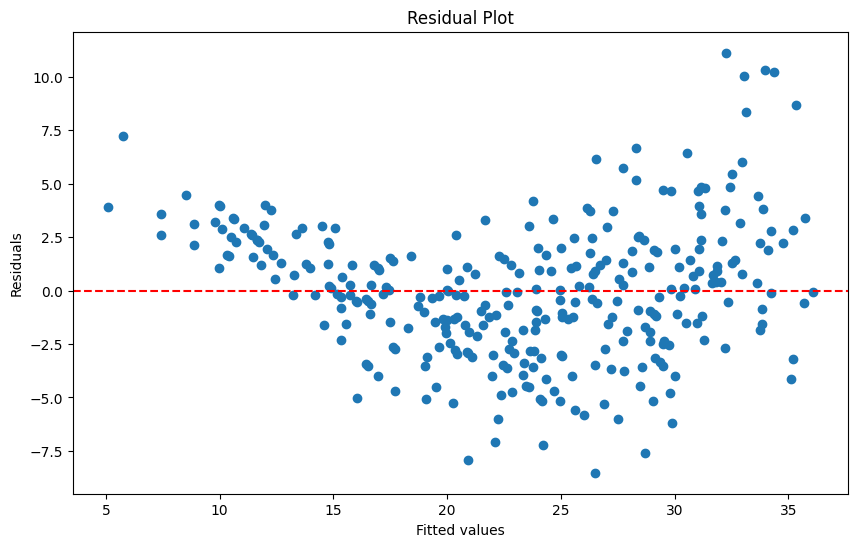

outliers_residuals
 326    11.122126
325    10.335686
244    10.053173
329    10.229720
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     205.1
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          4.98e-117
Time:                        12:22:55   Log-Likelihood:                -773.89
No. Observations:                 310   AIC:                             1566.
Df Residuals:                     301   BIC:                             1599.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [21]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = model_1.resid
print("Residulas:\n", residuals)
print("Fittedvalues:\n", model_1.fittedvalues)
print("Real values:\n", y_train)
print("Residulas mean:\n", residuals.mean())

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(model_1.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Identify outliers based on residuals
outlier_threshold = 3 * residuals.std()
# outlier_threshold = 2 * residuals.std()

outliers_residuals = residuals[abs(residuals) > outlier_threshold]
print("outliers_residuals\n", outliers_residuals)

# Remove outliers from the training data
train_df_residuals_cleaned = train_df.drop(outliers_residuals.index)

# Recalculate design matrices without outliers
y_train_residuals_cleaned, X_train_1_residuals_cleaned = patsy.dmatrices(formula_1, data=train_df_residuals_cleaned, return_type='dataframe')

# Fit the model on cleaned data
model_1_residuals_cleaned = sm.OLS(y_train_residuals_cleaned, X_train_1_residuals_cleaned).fit()

# Print the summary of the cleaned model
print(model_1_residuals_cleaned.summary())

# Calculate generalization error for the cleaned model
y_val_1_residuals_cleaned, X_val_1_residuals_cleaned = patsy.dmatrices(formula_1, data=val_df, return_type='dataframe')
pred_1_residuals_cleaned = model_1_residuals_cleaned.predict(X_val_1_residuals_cleaned)
mse_1_residuals_cleaned = mean_squared_error(y_val_1, pred_1_residuals_cleaned)
print(f'Cleaned Model 1 MSE: {mse_1_residuals_cleaned}')


In [18]:
from scipy import stats
import numpy as np

# Calculate Z-Scores for the dataset
z_scores = np.abs(stats.zscore(train_df.select_dtypes(include=[np.number])))
print("z_scores:")
print(z_scores)
# Define a threshold for Z-Scores
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)
print(outliers)

# Remove outliers
train_df_cleaned = train_df.drop(train_df.index[outliers[0]])

# Recalculate design matrices without outliers
y_train_cleaned, X_train_1_cleaned = patsy.dmatrices(formula_1, data=train_df_cleaned, return_type='dataframe')
y_train_cleaned, X_train_2_cleaned = patsy.dmatrices(formula_2, data=train_df_cleaned, return_type='dataframe')
y_train_cleaned, X_train_3_cleaned = patsy.dmatrices(formula_3, data=train_df_cleaned, return_type='dataframe')
y_train_cleaned, X_train_4_cleaned = patsy.dmatrices(formula_4, data=train_df_cleaned, return_type='dataframe')

# Fit the models on cleaned data
model_1_cleaned = sm.OLS(y_train_cleaned, X_train_1_cleaned).fit()
model_2_cleaned = sm.OLS(y_train_cleaned, X_train_2_cleaned).fit()
model_3_cleaned = sm.OLS(y_train_cleaned, X_train_3_cleaned).fit()
model_4_cleaned = sm.OLS(y_train_cleaned, X_train_4_cleaned).fit()

# Print the summaries of the cleaned models
print(model_1_cleaned.summary())
print(model_2_cleaned.summary())
print(model_3_cleaned.summary())
print(model_4_cleaned.summary())

# Calculate generalization error for each cleaned model
y_val_cleaned, X_val_1_cleaned = patsy.dmatrices(formula_1, data=val_df, return_type='dataframe')
y_val_cleaned, X_val_2_cleaned = patsy.dmatrices(formula_2, data=val_df, return_type='dataframe')
y_val_cleaned, X_val_3_cleaned = patsy.dmatrices(formula_3, data=val_df, return_type='dataframe')
y_val_cleaned, X_val_4_cleaned = patsy.dmatrices(formula_4, data=val_df, return_type='dataframe')

pred_1_cleaned = model_1_cleaned.predict(X_val_1_cleaned)
pred_2_cleaned = model_2_cleaned.predict(X_val_2_cleaned)
pred_3_cleaned = model_3_cleaned.predict(X_val_3_cleaned)
pred_4_cleaned = model_4_cleaned.predict(X_val_4_cleaned)

mse_1_cleaned = mean_squared_error(y_val_cleaned, pred_1_cleaned)
mse_2_cleaned = mean_squared_error(y_val_cleaned, pred_2_cleaned)
mse_3_cleaned = mean_squared_error(y_val_cleaned, pred_3_cleaned)
mse_4_cleaned = mean_squared_error(y_val_cleaned, pred_4_cleaned)

print(f'Cleaned Model 1 MSE: {mse_1_cleaned}')
print(f'Cleaned Model 2 MSE: {mse_2_cleaned}')
print(f'Cleaned Model 3 MSE: {mse_3_cleaned}')
print(f'Cleaned Model 4 MSE: {mse_4_cleaned}')

z_scores:
          mpg  cylinders  displacement  horsepower    weight  acceleration  \
262  0.524563   1.457748      1.050097    1.056681  0.520295      0.825613   
113  0.292990   0.287076      0.395815    0.061392  0.614377      0.538165   
176  0.550294   0.287076      0.346420    0.383868  0.265499      0.539767   
63   1.193553   1.457748      1.965842    1.842435  1.663301      1.256785   
245  1.649652   0.883597      0.945261    1.012472  1.414481      0.394440   
..        ...        ...           ...         ...       ...           ...   
71   0.550294   1.468933      1.215165    0.200526  0.783447      0.717820   
106  1.450857   1.457748      1.483871    1.973394  1.799033      1.077130   
270  0.280125   0.883597      0.598242    0.252909  0.563180      0.250716   
348  1.855495   0.883597      1.032016    1.117239  1.116824      0.647560   
102  0.350269   0.883597      0.954901    1.536308  1.235887      1.977008   

         year  
262  0.521359  
113  0.870704  
176  